In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('homicidios_completo.csv')

Generamos un resumen estadístico de la columna ‘EDAD’. Esto nos proporciona información valiosa como la media, mediana, desviación estándar, mínimo, máximo y los cuartiles

In [50]:
print(df[['EDAD']].describe(include='all'))

             EDAD
count  716.000000
mean    39.104749
std     21.977520
min      0.000000
25%     24.000000
50%     35.000000
75%     55.000000
max     95.000000


Creamos histogramas para las columnas 'EDAD' y 'COMUNA' para entender la distribución de los datos. Nos permite visualizar la frecuencia de accidentes por edad y por comunas.

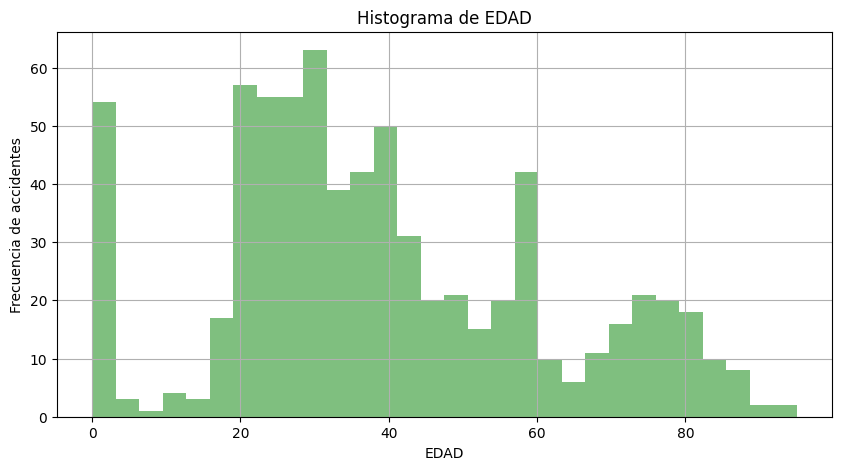

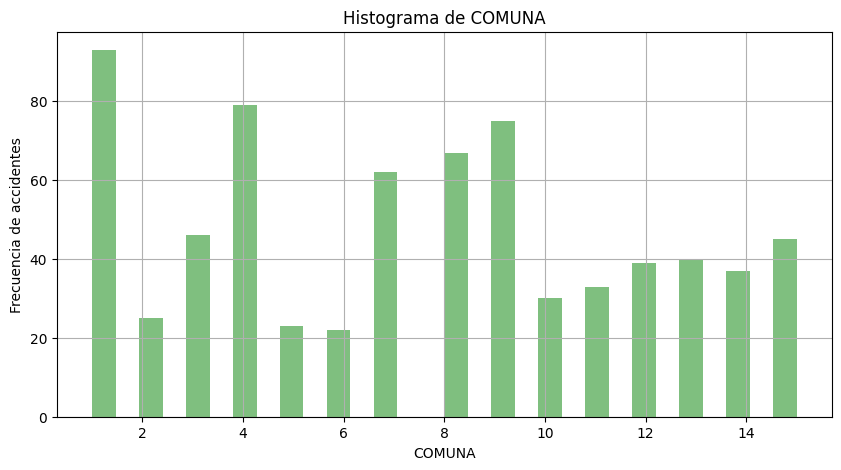

In [20]:
# Lista de columnas
num_cols = ['EDAD', 'COMUNA']

# Crea un histograma para cada columna
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.hist(df[col].dropna(), bins=30, alpha=0.5, color='g')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia de accidentes')
    plt.grid(True)
    plt.show()

Generamos diagramas de caja para las columnas 'AÑO', 'MES', 'DIA', 'COMUNA' y 'EDAD'. Estos diagramas son útiles para visualizar la distribución de los datos y detectar valores atípicos.

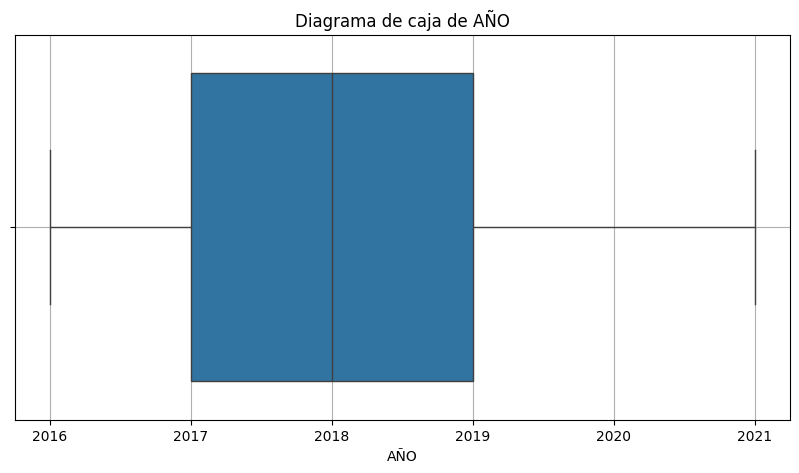

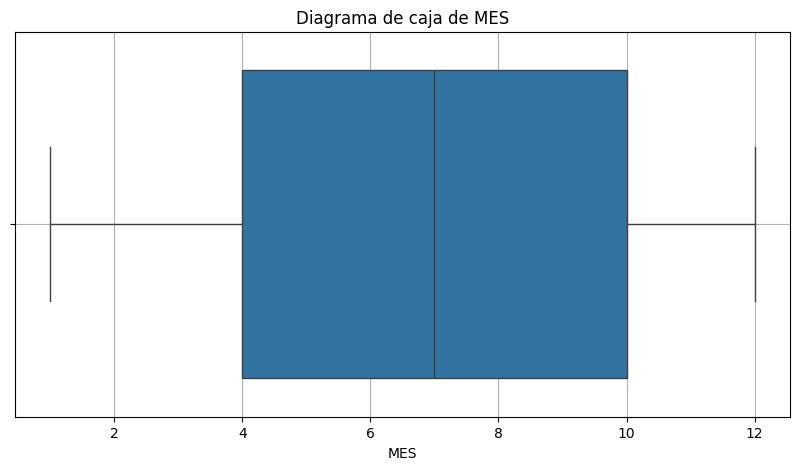

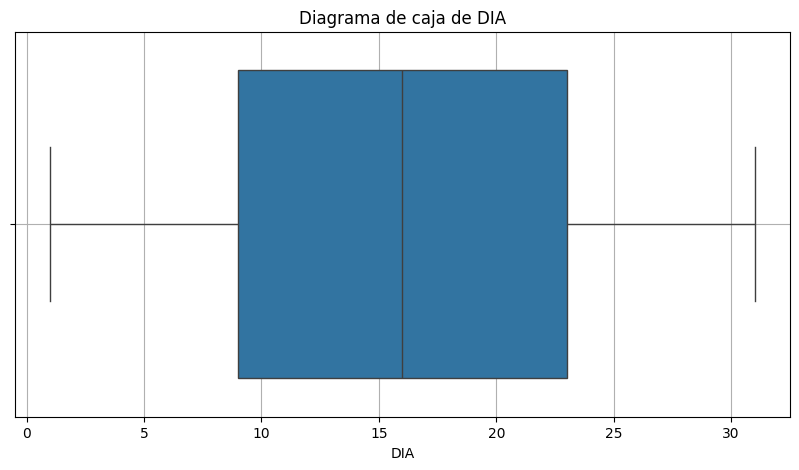

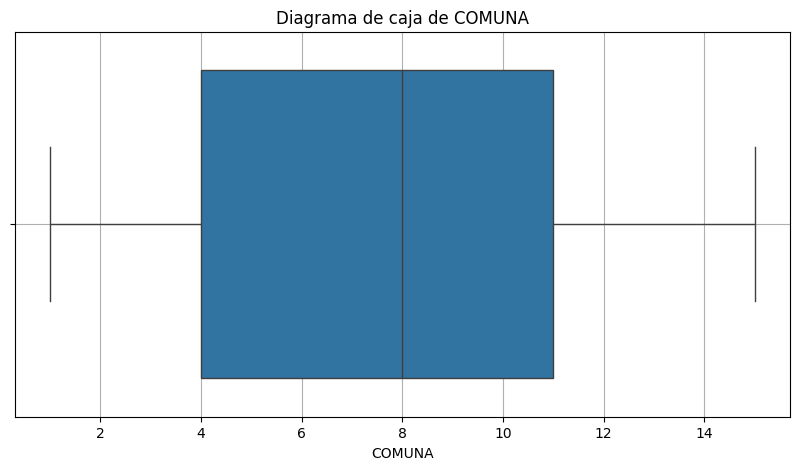

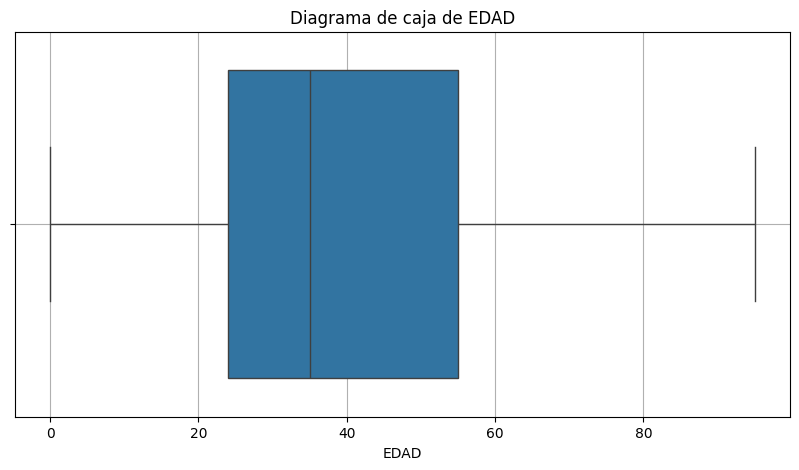

In [21]:
# Lista de columnas
num_cols = ['AÑO', 'MES', 'DIA', 'COMUNA', 'EDAD']

# Crea un boxplot para cada columna
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Diagrama de caja de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

Usamos graficos de barras para ver la frecuencia de cada categoria en las columnas 'TIPO_DE_CALLE', 'COMUNA', 'VICTIMA', 'ACUSADO', 'ROL_VICTIMA' y 'SEXO'.
Estos nos permite ver con que frecuencia aparece cada categoria.

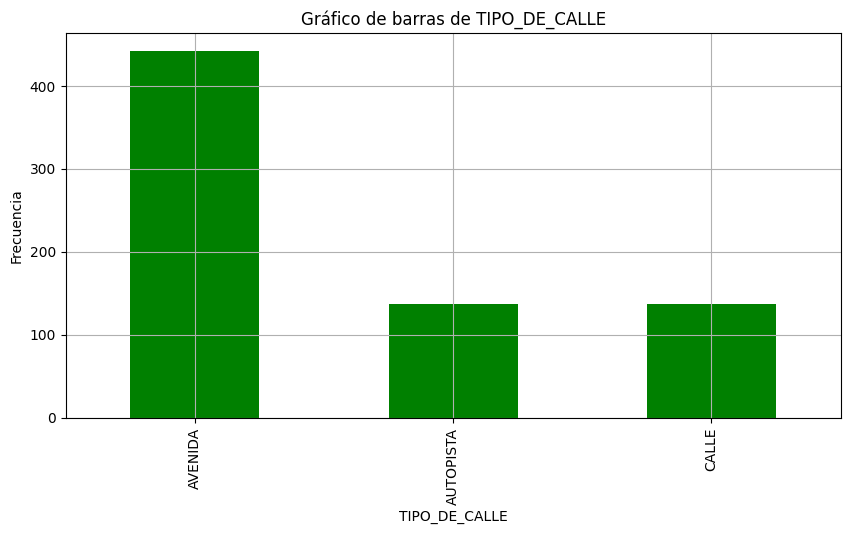

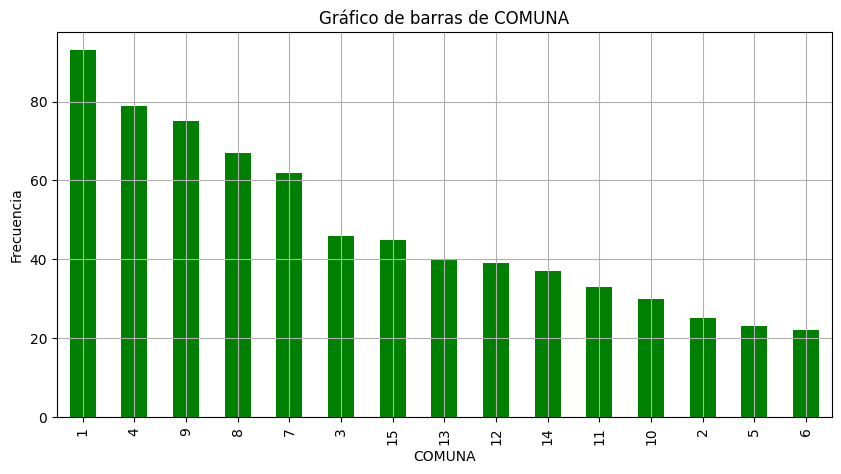

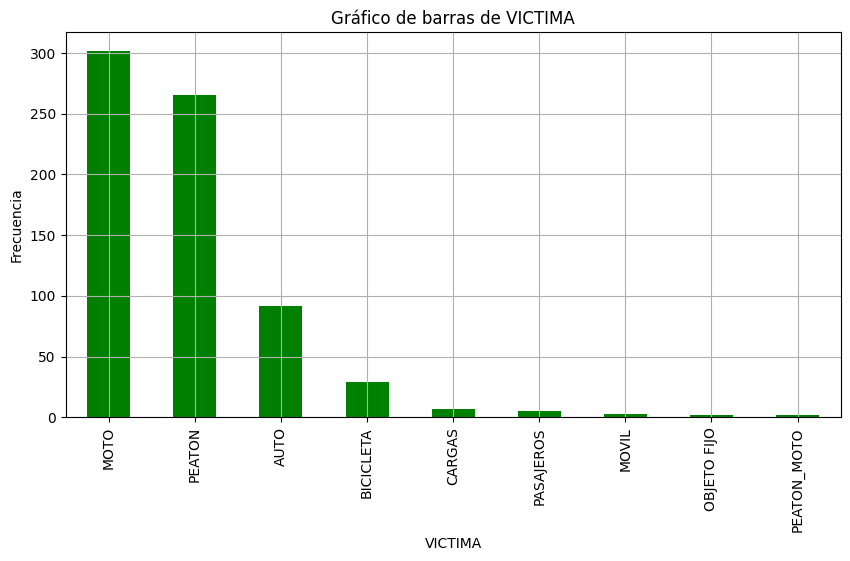

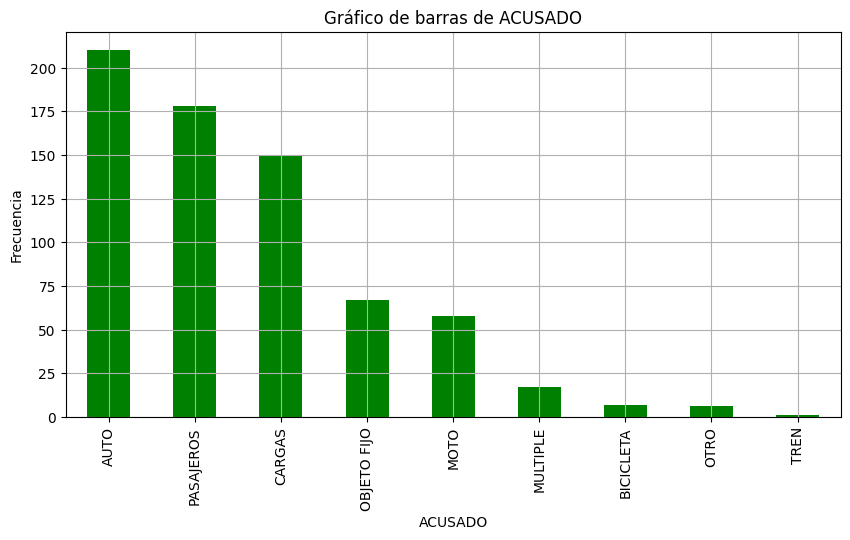

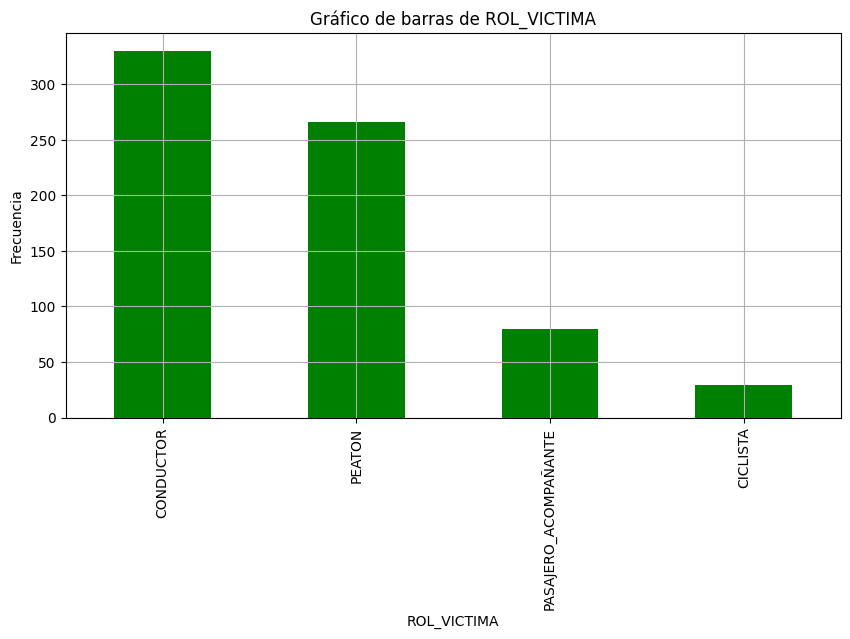

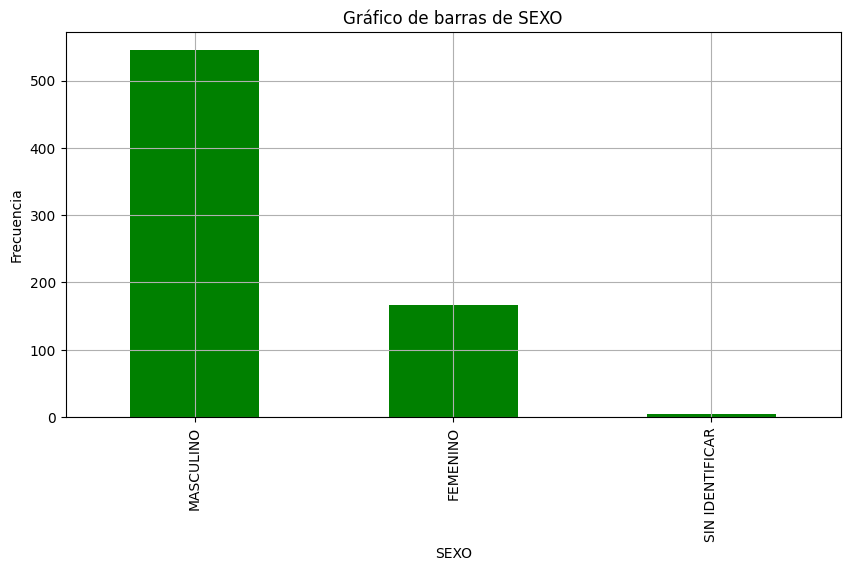

In [23]:
# Lista de columnas
cat_cols = ['TIPO_DE_CALLE', 'COMUNA', 'VICTIMA', 'ACUSADO', 'ROL_VICTIMA', 'SEXO']

# Crea un gráfico de barras para cada columna
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar', color='g')
    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

Analizamos las tendencias temporales por medio de la fecha, en este caso lo hacemos comparando los años, los meses y los dias

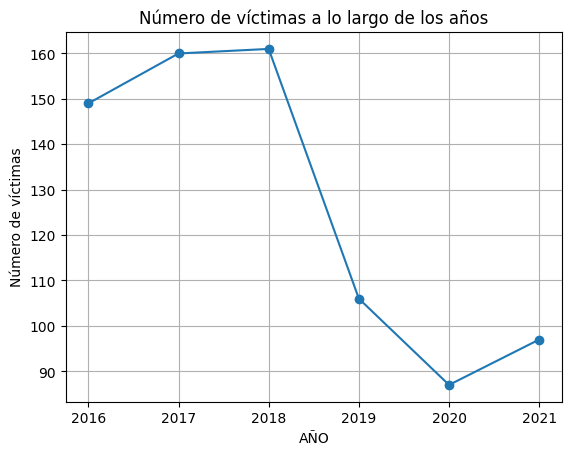

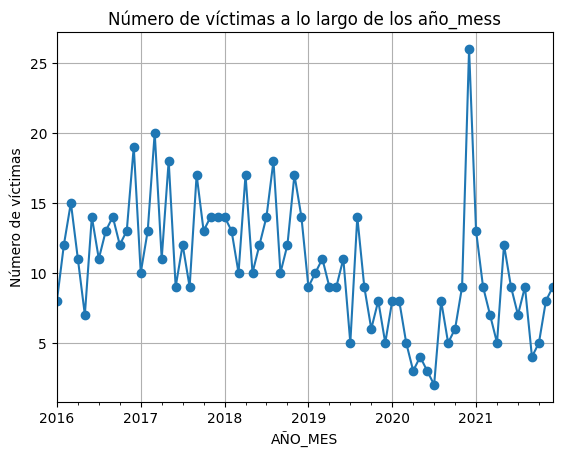

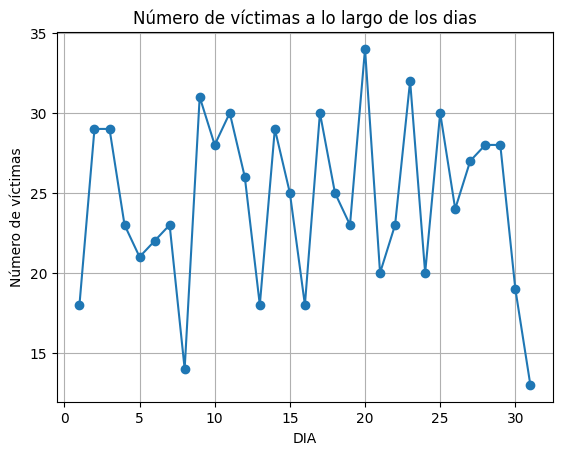

In [27]:
# Convierte la columna 'FECHA' a formato de fecha
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Crea una nueva columna 'AÑO_MES' para analizar las tendencias mensuales
df['AÑO_MES'] = df['FECHA'].dt.to_period('M')

# Crea una nueva columna 'DIA' para analizar las tendencias diarias
df['DIA'] = df['FECHA'].dt.day

# Crea gráficos de líneas para el número de víctimas a lo largo de los años, los meses y los días
for time in ['AÑO', 'AÑO_MES', 'DIA']:
    df.groupby(time)['N_VICTIMAS'].sum().plot(kind='line', marker='o')
    plt.title(f'Número de víctimas a lo largo de los {time.lower()}s')
    plt.xlabel(time)
    plt.ylabel('Número de víctimas')
    plt.grid(True)
    plt.show()

Creamos graficos de Dispercion para ver la relacion entre los datos, en este caso los graficos son de la edad - año, edad - mes, comuna - mes y edad - comuna

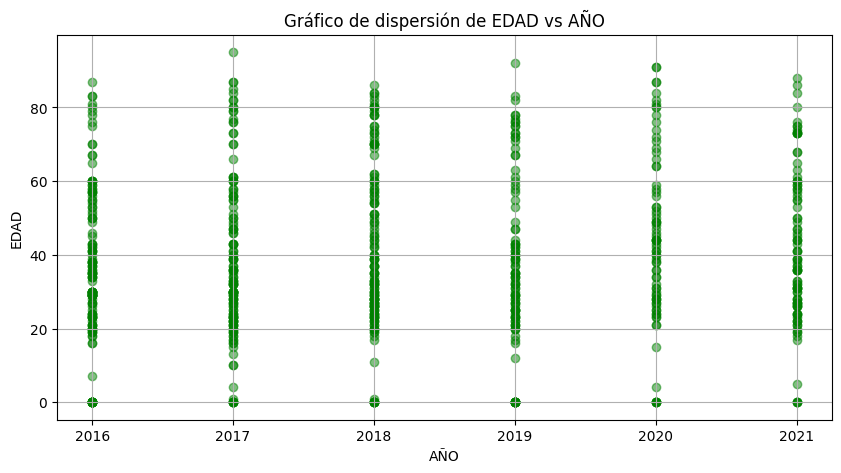

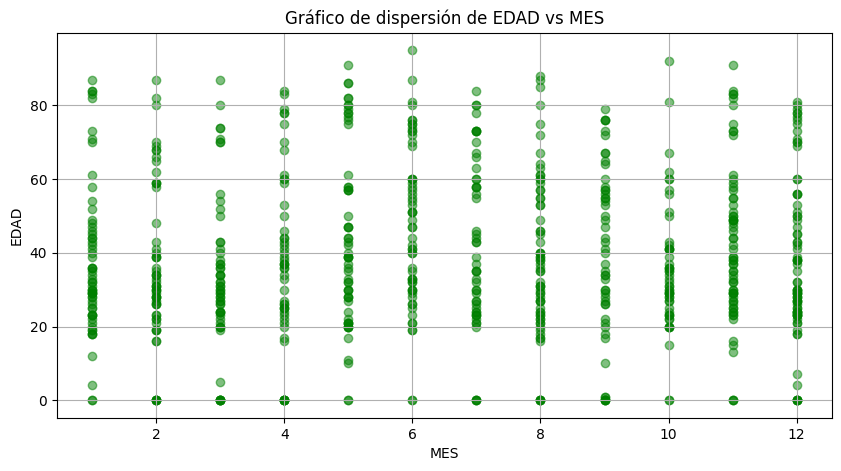

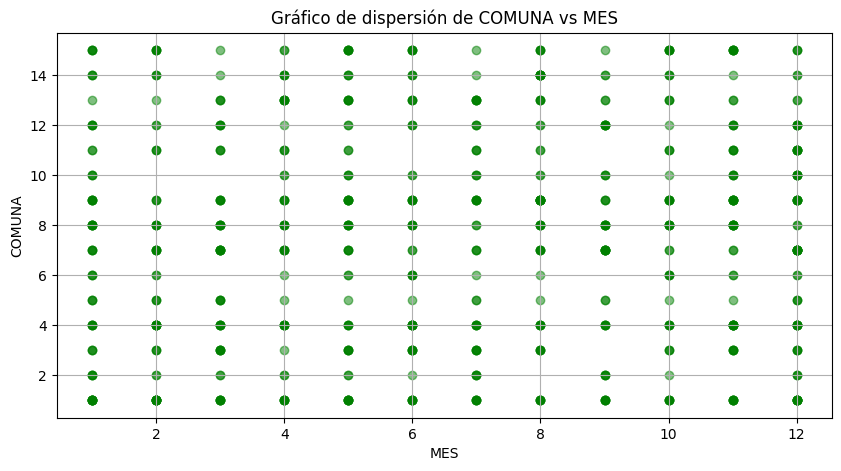

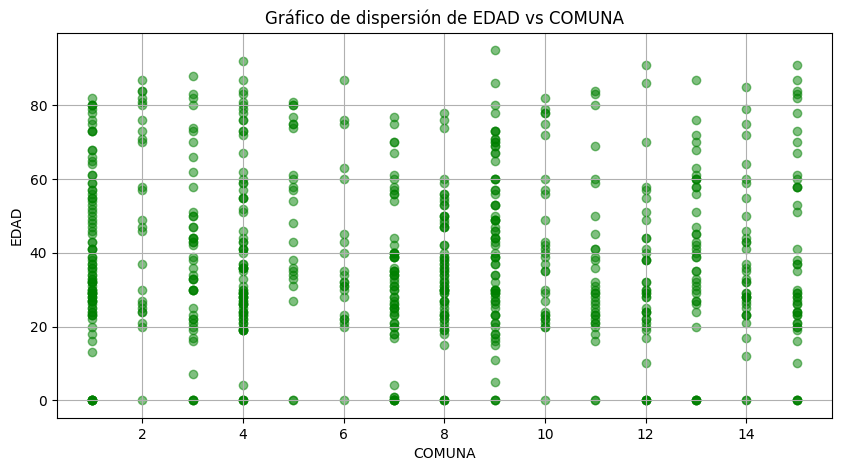

In [38]:
# Lista de pares de columnas numéricas para los que quieres crear gráficos de dispersión
pairs = [('AÑO', 'EDAD'), ('MES', 'EDAD'), ('MES', 'COMUNA'), ('COMUNA', 'EDAD')]

# Crea un gráfico de dispersión para cada par de columnas numéricas
for x, y in pairs:
    plt.figure(figsize=(10, 5))
    plt.scatter(df[x], df[y], alpha=0.5, color='g')
    plt.title(f'Gráfico de dispersión de {y} - {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

Identificamos los valores faltantes dentro del DF 

                     Total Valores Faltantes  Porcentaje
ID                                         0    0.000000
N_VICTIMAS                                 0    0.000000
FECHA                                      0    0.000000
AÑO                                        0    0.000000
MES                                        0    0.000000
DIA                                        0    0.000000
HORA                                       0    0.000000
LUGAR_DEL_HECHO                            0    0.000000
TIPO_DE_CALLE                              0    0.000000
COMUNA                                     0    0.000000
LONGITUD                                   0    0.000000
LATITUD                                    0    0.000000
VICTIMA                                    9    1.256983
ACUSADO                                   22    3.072626
ROL_VICTIMA                               11    1.536313
SEXO                                       0    0.000000
EDAD                           

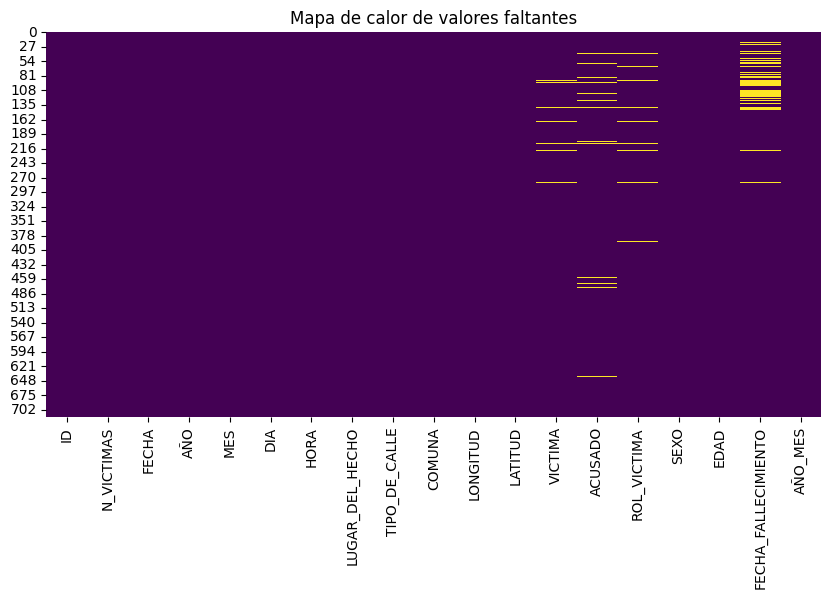

In [40]:
# Calcula el número total de valores faltantes por columna
missing_values = df.isnull().sum()

# Calcula el porcentaje de valores faltantes por columna
missing_percent = missing_values / len(df) * 100

# Crea un DataFrame para visualizar los resultados
missing_df = pd.DataFrame({'Total Valores Faltantes': missing_values, 'Porcentaje': missing_percent})

# Imprime el DataFrame
print(missing_df)

# Crea un mapa de calor para visualizar los valores faltantes
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

Generamos un analisis de frecuencia a la columna COMUNA para verificar cuantas veces aparece cada comuna en los datos.

In [44]:
# Realiza un análisis de frecuencia en la columna 'COMUNA'
freq_analysis = df['COMUNA'].value_counts()

# Imprime los resultados
print(freq_analysis)

COMUNA
1     93
4     79
9     75
8     67
7     62
3     46
15    45
13    40
12    39
14    37
11    33
10    30
2     25
5     23
6     22
Name: count, dtype: int64
